In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.insert(0, '../../src/utils')
import constants

In [69]:
CONFIG_1 = 'D1-K1'
CONFIG_2 = 'D1-K2'
CONFIG_3 = 'D2-K1'
CONFIG_4 = 'D2-K2'

In [79]:
d1 = pd.read_json(constants.CURR_DATASETS_PATH + f'/SBOX_OUT/{CONFIG_1}_train.json')
x1 = np.array([df1.at[i, 'samples'] for i in range(df1.shape[0])])
x1 = np.mean(x1, axis=0)

df2 = pd.read_json(constants.CURR_DATASETS_PATH + f'/SBOX_OUT/{CONFIG_1}_test.json')
x2 = np.array([df2.at[i, 'samples'] for i in range(df2.shape[0])])
x2 = np.mean(x2, axis=0)

df3 = pd.read_json(constants.CURR_DATASETS_PATH + f'/SBOX_OUT/{CONFIG_2}_train.json')
x3 = np.array([df3.at[i, 'samples'] for i in range(df3.shape[0])])
x3 = np.mean(x3, axis=0)

df4 = pd.read_json(constants.CURR_DATASETS_PATH + f'/SBOX_OUT/{CONFIG_3}_train.json')
x4 = np.array([df4.at[i, 'samples'] for i in range(df4.shape[0])])
x4 = np.mean(x4, axis=0)

df5 = pd.read_json(constants.CURR_DATASETS_PATH + f'/SBOX_OUT/{CONFIG_4}_train.json')
x5 = np.array([df5.at[i, 'samples'] for i in range(df5.shape[0])])
x5 = np.mean(x5, axis=0)

sameD_sameK = np.absolute(x1 - x2)
sameD_diffK = np.absolute(x1 - x3)
diffD_sameK = np.absolute(x1 - x4)
diffD_diffK = np.absolute(x1 - x5)

In [136]:
scenarios = [('S dev, S k', sameD_sameK), 
             ('S dev, D k', sameD_diffK), 
             ('D dev, S k', diffD_sameK), 
             ('D dev, D k', diffD_diffK)]

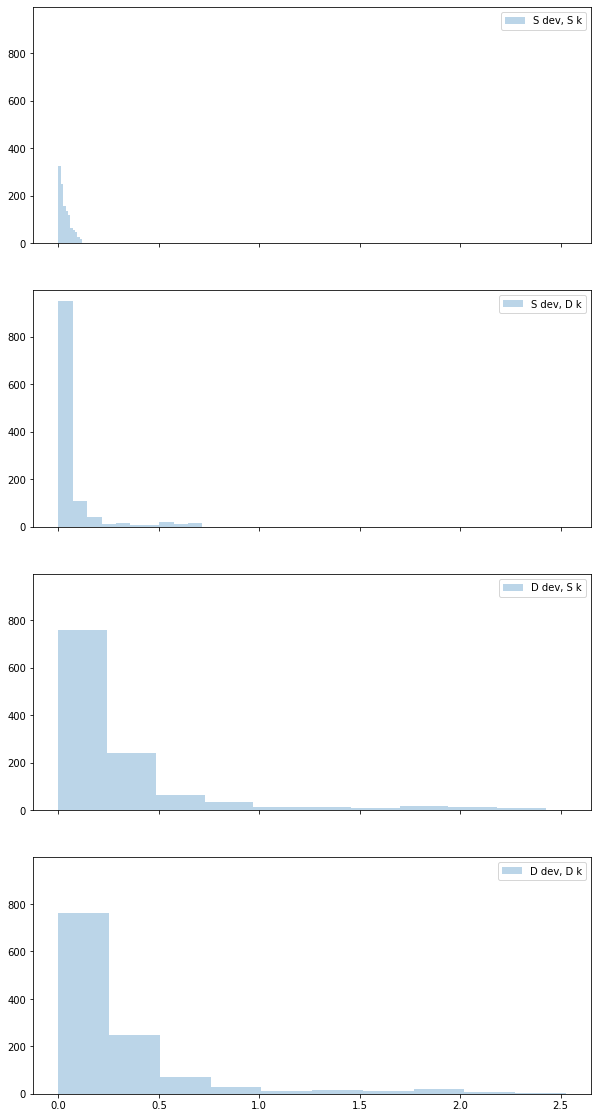

In [137]:
f, ax = plt.subplots(4, 1, figsize=(10,20), sharex=True, sharey=True)

for i, (l, s) in enumerate(scenarios):
    ax[i].hist(s, label=l, alpha=0.3)
    ax[i].legend()

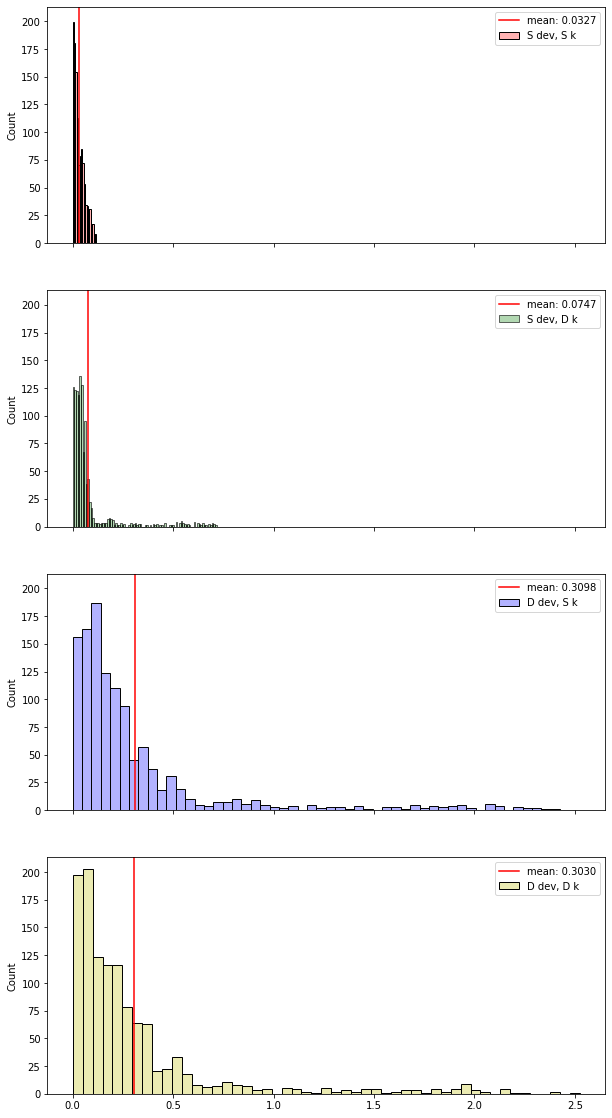

In [138]:
f, ax = plt.subplots(4, 1, figsize=(10,20), sharex=True, sharey=True)

colors = ['r', 'g', 'b', 'y']

for i, (l, s) in enumerate(scenarios):
    sns.histplot(s, label=l, alpha=0.3, color=colors[i], ax=ax[i])
    ax[i].axvline(np.mean(s), color='r', label=f'mean: {np.mean(s):.4f}')
    ax[i].legend()
    
plt.show()

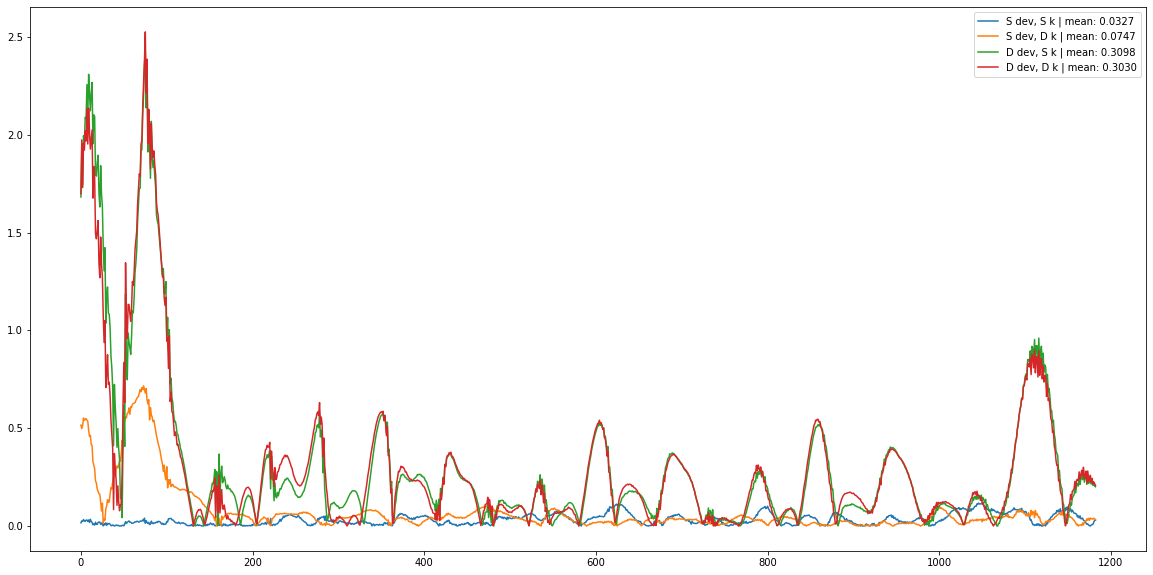

In [88]:
f, ax = plt.subplots(figsize=(20,10))

for l, s in scenarios:
    ax.plot(s, label=l)
    
ax.legend()

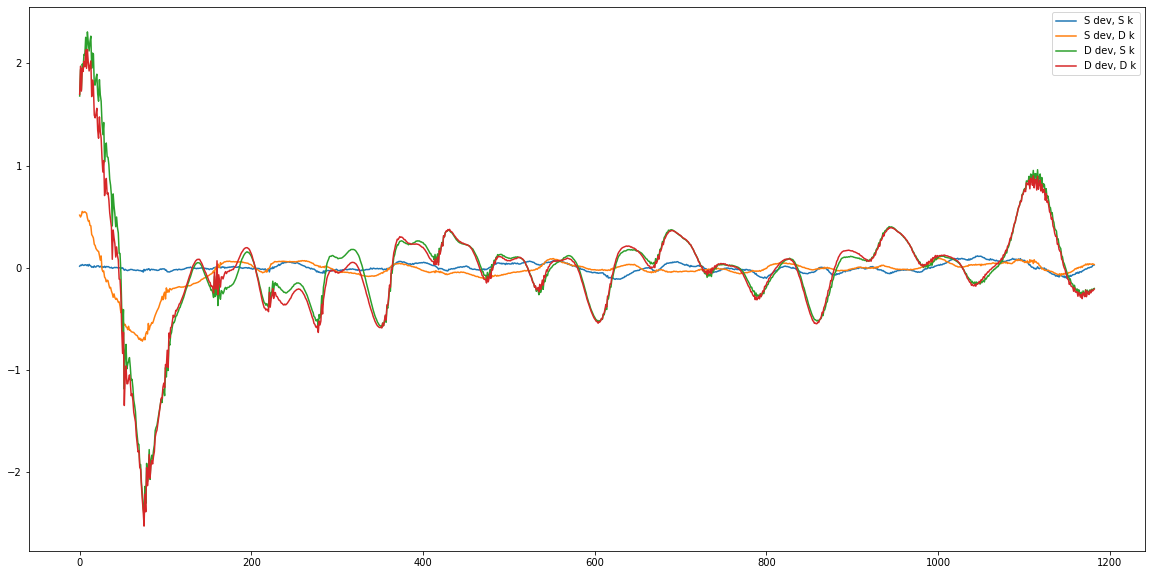

In [89]:
f, ax = plt.subplots(figsize=(20,10))

ax.plot(x1-x2, label='S dev, S k')
ax.plot(x1-x3, label='S dev, D k')
ax.plot(x1-x4, label='D dev, S k')
ax.plot(x1-x5, label='D dev, D k')
    
ax.legend()

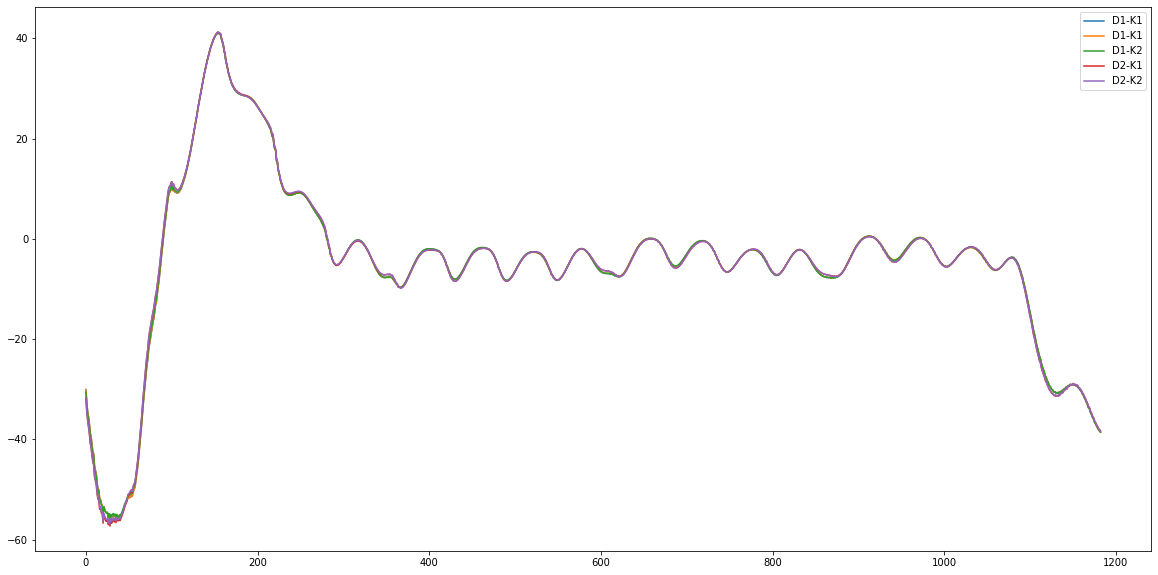

In [99]:
f, ax = plt.subplots(figsize=(20,10))

ax.plot(x1, label=CONFIG_1)
ax.plot(x2, label=CONFIG_1)
ax.plot(x3, label=CONFIG_2)
ax.plot(x4, label=CONFIG_3)
ax.plot(x5, label=CONFIG_4)
    
ax.legend()

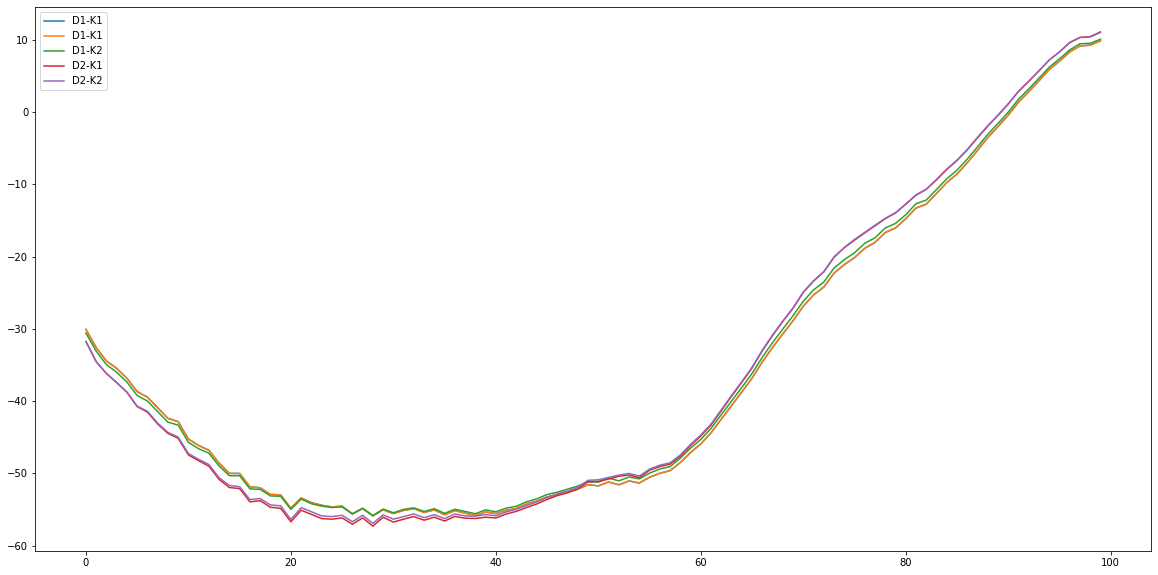

In [103]:
f, ax = plt.subplots(figsize=(20,10))

ax.plot(x1[:100], label=CONFIG_1)
ax.plot(x2[:100], label=CONFIG_1)
ax.plot(x3[:100], label=CONFIG_2)
ax.plot(x4[:100], label=CONFIG_3)
ax.plot(x5[:100], label=CONFIG_4)
    
ax.legend()

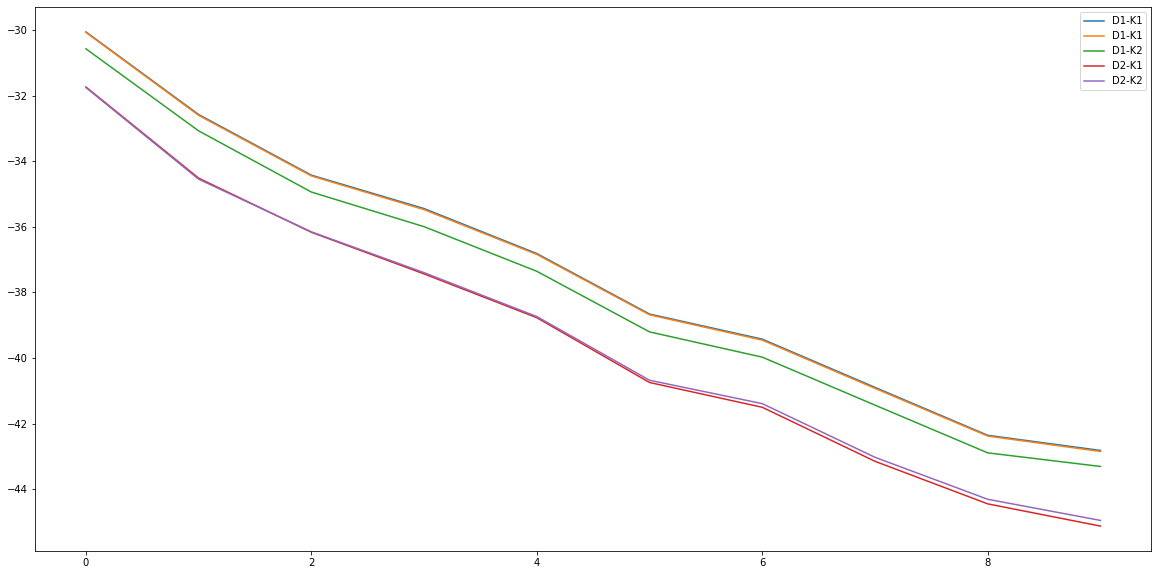

In [102]:
f, ax = plt.subplots(figsize=(20,10))

ax.plot(x1[:10], label=CONFIG_1)
ax.plot(x2[:10], label=CONFIG_1)
ax.plot(x3[:10], label=CONFIG_2)
ax.plot(x4[:10], label=CONFIG_3)
ax.plot(x5[:10], label=CONFIG_4)
    
ax.legend()

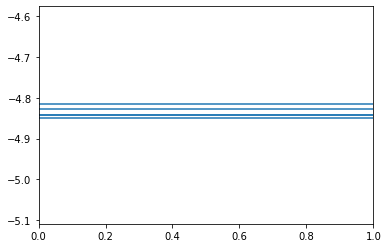

In [ ]:
plt.axhline(np.mean(x1), label=CONFIG_1)
plt.axhline(np.mean(x2), label=CONFIG_1)
plt.axhline(np.mean(x3), label=CONFIG_1)
plt.axhline(np.mean(x4), label=CONFIG_1)
plt.axhline(np.mean(x5), label=CONFIG_1)

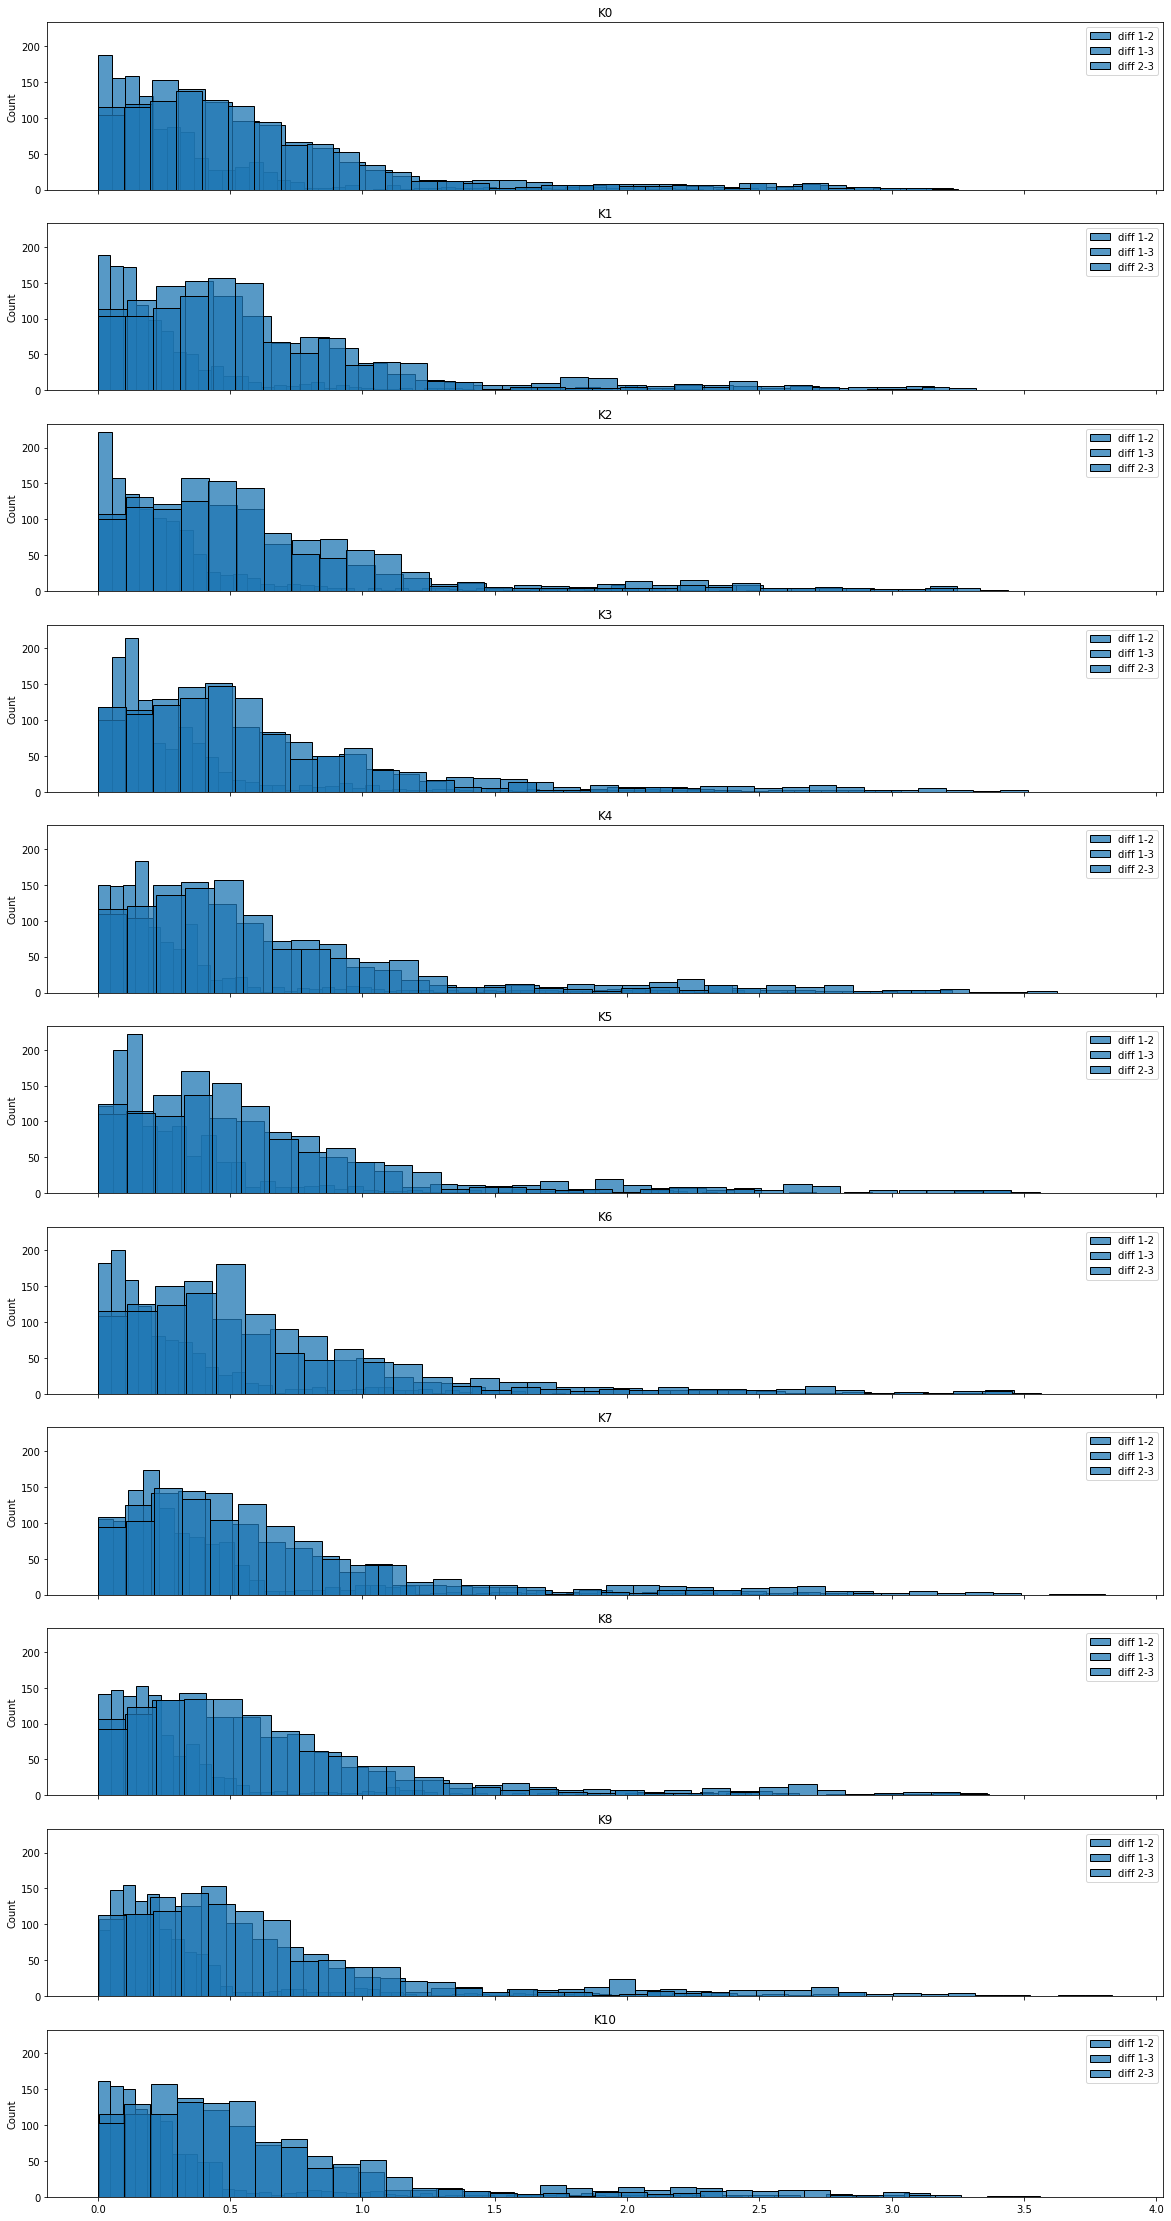

In [125]:
f, ax = plt.subplots(11, 1, figsize=(20,40), sharex=True, sharey=True)

for i in tqdm(range(11)):
    
    c1 = f'D1-K{i}'
    c2 = f'D2-K{i}'
    c3 = f'D3-K{i}'
    
    d1 = pd.read_json(constants.CURR_DATASETS_PATH + f'/SBOX_OUT/{c1}_train.json')
    x1 = np.array([df1.at[i, 'samples'] for i in range(df1.shape[0])])
    x1 = np.mean(x1, axis=0)

    df2 = pd.read_json(constants.CURR_DATASETS_PATH + f'/SBOX_OUT/{c2}_test.json')
    x2 = np.array([df2.at[i, 'samples'] for i in range(df2.shape[0])])
    x2 = np.mean(x2, axis=0)

    df3 = pd.read_json(constants.CURR_DATASETS_PATH + f'/SBOX_OUT/{c3}_train.json')
    x3 = np.array([df3.at[i, 'samples'] for i in range(df3.shape[0])])
    x3 = np.mean(x3, axis=0)
    
    x12 = np.absolute(x1 - x2)
    x13 = np.absolute(x1 - x3)
    x23 = np.absolute(x2 - x3)
    
    # x12 = x1 - x2
    # x13 = x1 - x3
    # x23 = x2 - x3
    
    
    
    
    ax[i].set_title(f'K{i}')
    sns.histplot(data=x12, ax=ax[i], label='diff 1-2')
    sns.histplot(data=x13, ax=ax[i], label='diff 1-3')
    sns.histplot(data=x23, ax=ax[i], label='diff 2-3')
    
#     ax.plot(x12, label='diff 1-2')
#     ax.plot(x13, label='diff 1-3')
#     ax.plot(x23, label='diff 2-3')
    
    # ax[i].hist(x12, label='diff 1-2', alpha=0.5)
    # ax[i].hist(x13, label='diff 1-3', alpha=0.5)
    # ax[i].hist(x23, label='diff 2-3', alpha=0.5)
    
    ax[i].legend()

plt.show()

<AxesSubplot:ylabel='Count'>

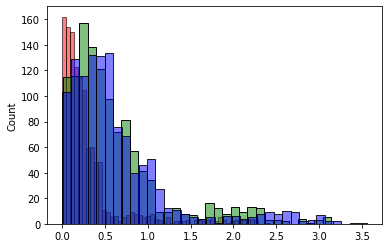

In [127]:
sns.histplot(x12, color='r', alpha=0.5)
sns.histplot(x13, color='g', alpha=0.5)
sns.histplot(x23, color='b', alpha=0.5)

In [139]:
uniques, count = np.unique(sameD_diffK, return_counts=True)

In [140]:
uniques

array([2.31250000e-04, 2.50000027e-04, 2.75000000e-04, ...,
       7.03400000e-01, 7.07358317e-01, 7.16512500e-01])

In [141]:
count

array([1, 1, 1, ..., 1, 1, 1])

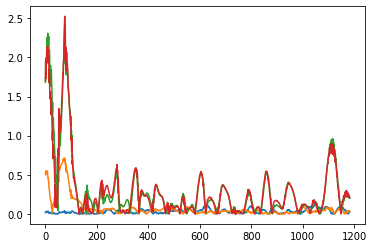

In [147]:
plt.plot(sameD_sameK)
plt.plot(sameD_diffK)
plt.plot(diffD_sameK)
plt.plot(diffD_diffK)

1176
1178
1180
1183


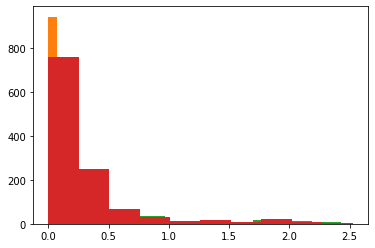

In [174]:
for l, s in scenarios:
    uniques, count = np.unique(s, return_counts=True)
    d = {u: count[i] for i, u in enumerate(uniques)}
    # print(np.sum(count))
    plt.hist(d)
    
    print(len(uniques))

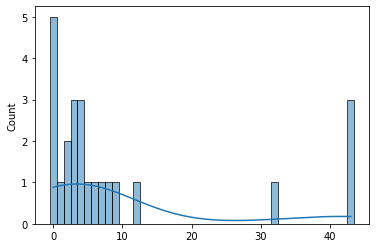

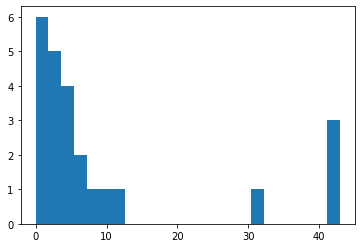

In [193]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 0, 0, 0, 2, 3, 4, 3, 4, 12, 32, 43, 43, 43]
sns.histplot(a, discrete=True, kde=True)
plt.show()

plt.hist(a, bins=len(a))
plt.show()

 S dev, S k | Seaborn


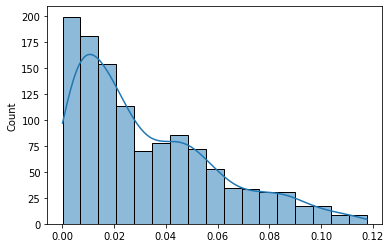

 S dev, S k | Seaborn discrete


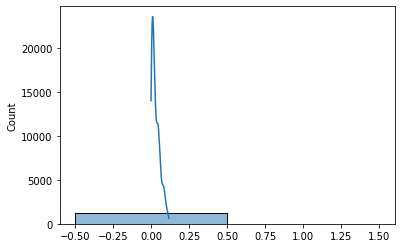


 S dev, S k | Matplotlib


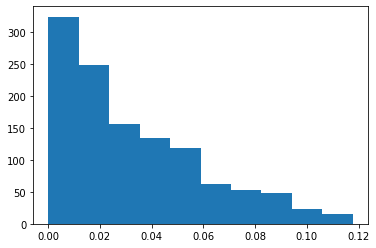


 S dev, S k | Matplotlib with bins


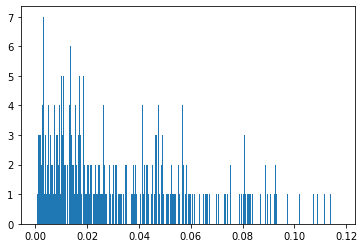



 S dev, D k | Seaborn


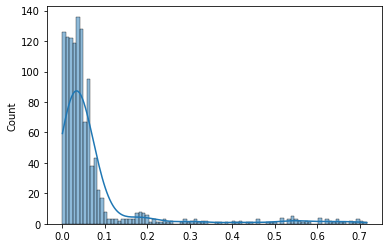

 S dev, D k | Seaborn discrete


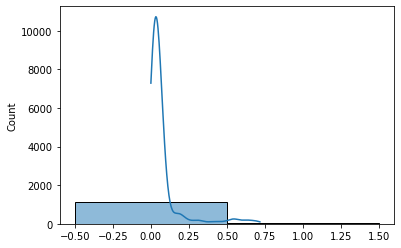


 S dev, D k | Matplotlib


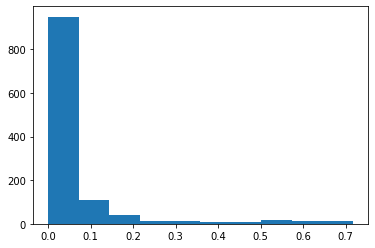


 S dev, D k | Matplotlib with bins


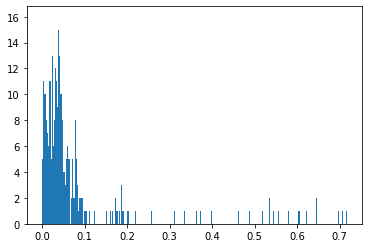



 D dev, S k | Seaborn


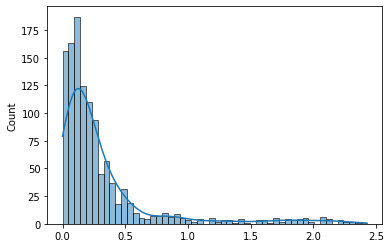

 D dev, S k | Seaborn discrete


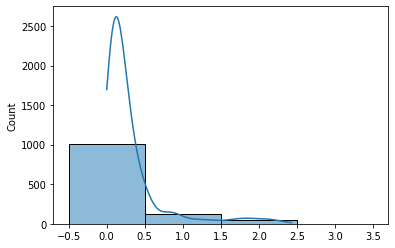


 D dev, S k | Matplotlib


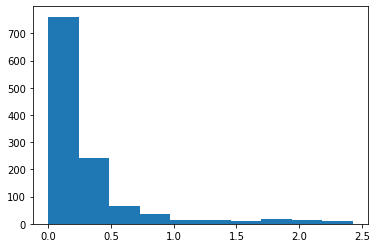


 D dev, S k | Matplotlib with bins


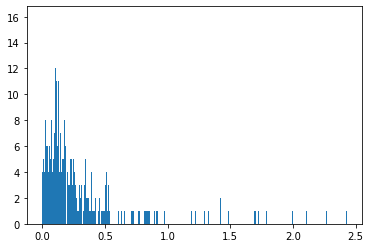



 D dev, D k | Seaborn


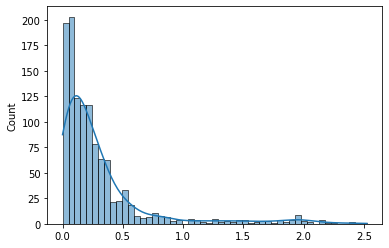

 D dev, D k | Seaborn discrete


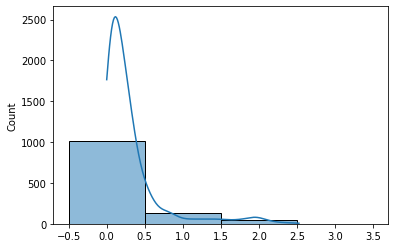


 D dev, D k | Matplotlib


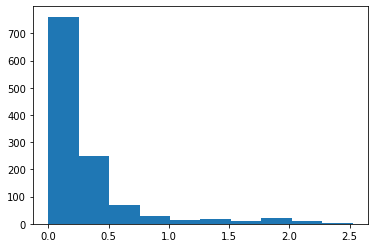


 D dev, D k | Matplotlib with bins


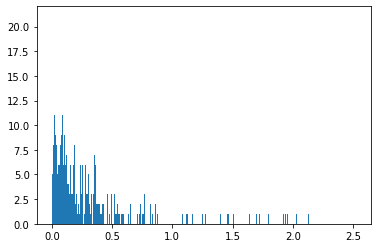

In [192]:
for l, s in scenarios:
    
    print(f' {l} | Seaborn')
    sns.histplot(s, kde=True)
    plt.show()

    print(f' {l} | Seaborn discrete')
    sns.histplot(s, discrete=True, kde=True)
    plt.show()

    print()
    print(f' {l} | Matplotlib')
    plt.hist(s)
    plt.show()
    
    print()
    print(f' {l} | Matplotlib with bins')
    plt.hist(s, bins=len(sameD_sameK))
    plt.show()
    
    print()
    print('=====================')
    print()

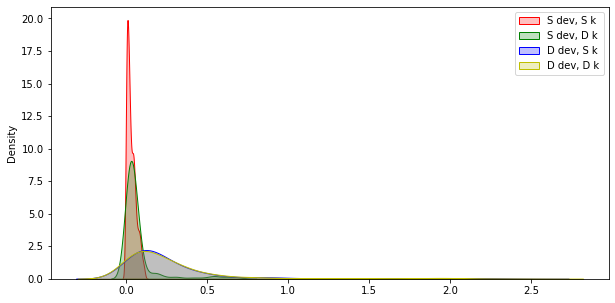

In [219]:
colors = ['r', 'g', 'b', 'y']  
f, ax = plt.subplots(figsize=(10, 5))

for i, (l, s) in enumerate(scenarios):
    sns.kdeplot(data=s, label=l, color=colors[i], ax=ax, fill=True)

plt.legend()
plt.show()